<a href="https://colab.research.google.com/github/18Priyadharshini/aicovidtweet/blob/main/Coronatweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [15]:
df_original=pd.read_excel('/content/Covid-19 Twitter Dataset (Apr-Jun 2020).xlsx')

In [16]:
print(df_original.columns)

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')


In [8]:
df1=df_original.copy()

In [9]:
df1.head()

id created_at                                             source  \
0  1.250000e+18 2020-04-19  <a href="http://twitter.com/download/android" ...   
1  1.250000e+18 2020-04-19  <a href="http://twitter.com/download/android" ...   
2  1.250000e+18 2020-04-19  <a href="http://twitter.com/download/iphone" r...   
3  1.250000e+18 2020-04-19  <a href="http://twitter.com/download/iphone" r...   
4  1.250000e+18 2020-04-19  <a href="http://twitter.com/download/android" ...   

                                       original_text lang  favorite_count  \
0  RT @GlblCtzn: .@priyankachopra is calling on l...   en             0.0   
1  RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...   en             0.0   
2  RT @AdvoBarryRoux: These 5 police officials ba...   en             0.0   
3  RT @MobilePunch: COVID-19: Oyo discharges two ...   en             0.0   
4  My Condolences to the Family of those who did ...   en             0.0   

   retweet_count  original_author  hashtags             user_mentions  \
0           31.0          RJIshak       NaN  GlblCtzn, priyankachopra   
1           61.0   makinwaoluwole       NaN             OGSG_Official   
2            1.0         TembeAmu       NaN             AdvoBarryRoux   
3            0.0       ilyasrabiu       NaN               MobilePunch   
4        13869.0  bucketeconomist  Covid_19                       NaN   

                    place                                        clean_tweet  \
0  Jakarta Capital Region  call leader help protect refuge covid19 provid...   
1                 Nigeria  ogun state support cbn nirsal covid19 target c...   
2                     NaN  polic offici base namahadi polic station busi ...   
3          Lagos, Nigeria                   covid19 oyo discharg two patient   
4                     NaN                               condol famili surviv   

   compound  neg    neu    pos sentiment  
0    0.8176  0.0  0.452  0.548       pos  
1    0.6486  0.0  0.602  0.398       pos  
2    0.2732  0.0  0.851  0.149       pos  
3    0.0000  0.0  1.000  0.000       neu  
4    0.0000  0.0  1.000  0.000       neu

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               143901 non-null  float64       
 1   created_at       143902 non-null  datetime64[ns]
 2   source           143876 non-null  object        
 3   original_text    143902 non-null  object        
 4   lang             143902 non-null  object        
 5   favorite_count   143902 non-null  float64       
 6   retweet_count    143902 non-null  float64       
 7   original_author  143902 non-null  object        
 8   hashtags         28510 non-null   object        
 9   user_mentions    107332 non-null  object        
 10  place            105021 non-null  object        
 11  clean_tweet      143419 non-null  object        
 12  compound         143903 non-null  float64       
 13  neg              143903 non-null  float64       
 14  neu              143

In [11]:
df1.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [17]:
df=df1[['original_text','sentiment']]

In [18]:
df.head()

original_text sentiment
0  RT @GlblCtzn: .@priyankachopra is calling on l...       pos
1  RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...       pos
2  RT @AdvoBarryRoux: These 5 police officials ba...       pos
3  RT @MobilePunch: COVID-19: Oyo discharges two ...       neu
4  My Condolences to the Family of those who did ...       neu

In [19]:
df.describe().T

count  unique  \
original_text  143902  143902   
sentiment      143903       3   

                                                             top   freq  
original_text  RT @GlblCtzn: .@priyankachopra is calling on l...      1  
sentiment                                                    neu  57586

In [21]:
df.sentiment.unique()

array(['pos', 'neu', 'neg'], dtype=object)

In [22]:
df.shape

(143903, 2)

In [23]:
len(df[df.duplicated()])

0

In [24]:
df["original_text"] = df["original_text"].str.lower()
df['original_text']

0         rt @glblctzn: .@priyankachopra is calling on l...
1         rt @ogsg_official: ogun state support for cbn-...
2         rt @advobarryroux: these 5 police officials ba...
3         rt @mobilepunch: covid-19: oyo discharges two ...
4         my condolences to the family of those who did ...
                                ...                        
143898    rt @stuartbrownfco: congratulations to all tho...
143899    rt @gemmaod1: apologies for any fear or anxiet...
143900    another meat processing outbreak - this time i...
143901    rt @honordecency: we knew covid-19 would be sp...
143902    rt @docjeffd: friends, this story misses the m...
Name: original_text, Length: 143903, dtype: object

In [25]:
df['original_text'][0]

'rt @glblctzn: .@priyankachopra is calling on leaders to help protect refugees from covid-19 by providing them with quality health care andâ€¦'

In [26]:
df['original_text'] = df['original_text'].str.replace('http\S+|www.\S+', '', case=False)

In [29]:
def remove_punctuations(text):
    if pd.isna(text):
        return text
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [30]:
df["clean_tweets"] = df['original_text'].apply(remove_punctuations)

In [31]:
df['clean_tweets']

0         rt glblctzn priyankachopra is calling on leade...
1         rt ogsgofficial ogun state support for cbnnirs...
2         rt advobarryroux these 5 police officials base...
3         rt mobilepunch covid19 oyo discharges two pati...
4         my condolences to the family of those who did ...
                                ...                        
143898    rt stuartbrownfco congratulations to all those...
143899    rt gemmaod1 apologies for any fear or anxiety ...
143900    another meat processing outbreak  this time in...
143901    rt honordecency we knew covid19 would be sprea...
143902    rt docjeffd friends this story misses the main...
Name: clean_tweets, Length: 143903, dtype: object

In [32]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head()

original_text sentiment  \
0  rt @glblctzn: .@priyankachopra is calling on l...       pos   
1  rt @ogsg_official: ogun state support for cbn-...       pos   
2  rt @advobarryroux: these 5 police officials ba...       pos   
3  rt @mobilepunch: covid-19: oyo discharges two ...       neu   
4  my condolences to the family of those who did ...       neu   

                                        clean_tweets  
0  rt glblctzn priyankachopra is calling on leade...  
1  rt ogsgofficial ogun state support for cbnnirs...  
2  rt advobarryroux these 5 police officials base...  
3  rt mobilepunch covid19 oyo discharges two pati...  
4  my condolences to the family of those who did ...

In [33]:
df['clean_tweets'][0]

'rt glblctzn priyankachopra is calling on leaders to help protect refugees from covid19 by providing them with quality health care andâ€¦'

In [34]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
def remove_stopwords(text):
    if pd.isna(text):
        return text
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return ' '.join(text)

In [38]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [39]:
df.clean_tweets[6]

'taiwans vicepresident chen chienjen countrys fight covid19â httpstcosmdtnfafzf'

In [78]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import download

# Download the necessary NLTK data
download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [76]:
def stemming(text):
    if pd.isna(text):
        return text
    stemmed_words = [stemmer.stem(word) for word in word_tokenize(text)]
    return ' '.join(stemmed_words)


In [79]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [50]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize(text):
    if pd.isna(text):
        return text
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(text)
df['lemmed'] = df['clean_tweets'].apply(lemmatize)

In [82]:
print(df)

                                            original_text sentiment  \
0       rt @glblctzn: .@priyankachopra is calling on l...       pos   
1       rt @ogsg_official: ogun state support for cbn-...       pos   
2       rt @advobarryroux: these 5 police officials ba...       pos   
3       rt @mobilepunch: covid-19: oyo discharges two ...       neu   
4       my condolences to the family of those who did ...       neu   
...                                                   ...       ...   
143898  rt @stuartbrownfco: congratulations to all tho...       neu   
143899  rt @gemmaod1: apologies for any fear or anxiet...       neg   
143900  another meat processing outbreak - this time i...       neu   
143901  rt @honordecency: we knew covid-19 would be sp...       pos   
143902  rt @docjeffd: friends, this story misses the m...       pos   

                                             clean_tweets  \
0       rt glblctzn priyankachopra calling leaders hel...   
1       rt ogsgofficial o

In [80]:
df.head()

original_text sentiment  \
0  rt @glblctzn: .@priyankachopra is calling on l...       pos   
1  rt @ogsg_official: ogun state support for cbn-...       pos   
2  rt @advobarryroux: these 5 police officials ba...       pos   
3  rt @mobilepunch: covid-19: oyo discharges two ...       neu   
4  my condolences to the family of those who did ...       neu   

                                        clean_tweets  \
0  rt glblctzn priyankachopra calling leaders hel...   
1  rt ogsgofficial ogun state support cbnnirsal c...   
2  rt advobarryroux 5 police officials based nama...   
3  rt mobilepunch covid19 oyo discharges two pati...   
4                 condolences family survive covid19   

                                             stemmed  \
0  rt glblctzn priyankachopra call leader help pr...   
1  rt ogsgoffici ogun state support cbnnirsal cov...   
2  rt advobarryroux 5 polic offici base namahadi ...   
3  rt mobilepunch covid19 oyo discharg two patien...   
4                       condol famili surviv covid19   

                                              lemmed  \
0  rt glblctzn priyankachopra calling leader help...   
1  rt ogsgofficial ogun state support cbnnirsal c...   
2  rt advobarryroux 5 police official based namah...   
3  rt mobilepunch covid19 oyo discharge two patie...   
4                  condolence family survive covid19   

                                           temp_list  
0  [rt, glblctzn, priyankachopra, calling, leader...  
1  [rt, ogsgofficial, ogun, state, support, cbnni...  
2  [rt, advobarryroux, 5, police, officials, base...  
3  [rt, mobilepunch, covid19, oyo, discharges, tw...  
4            [condolences, family, survive, covid19]

In [73]:
sentiment_count = df['sentiment'].value_counts().reset_index()
sentiment_count.columns = ['sentiment','count']
sentiment_count

sentiment  count
0       neu  57586
1       pos  46125
2       neg  40192

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='count', y='sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0, 0.5, 'count')

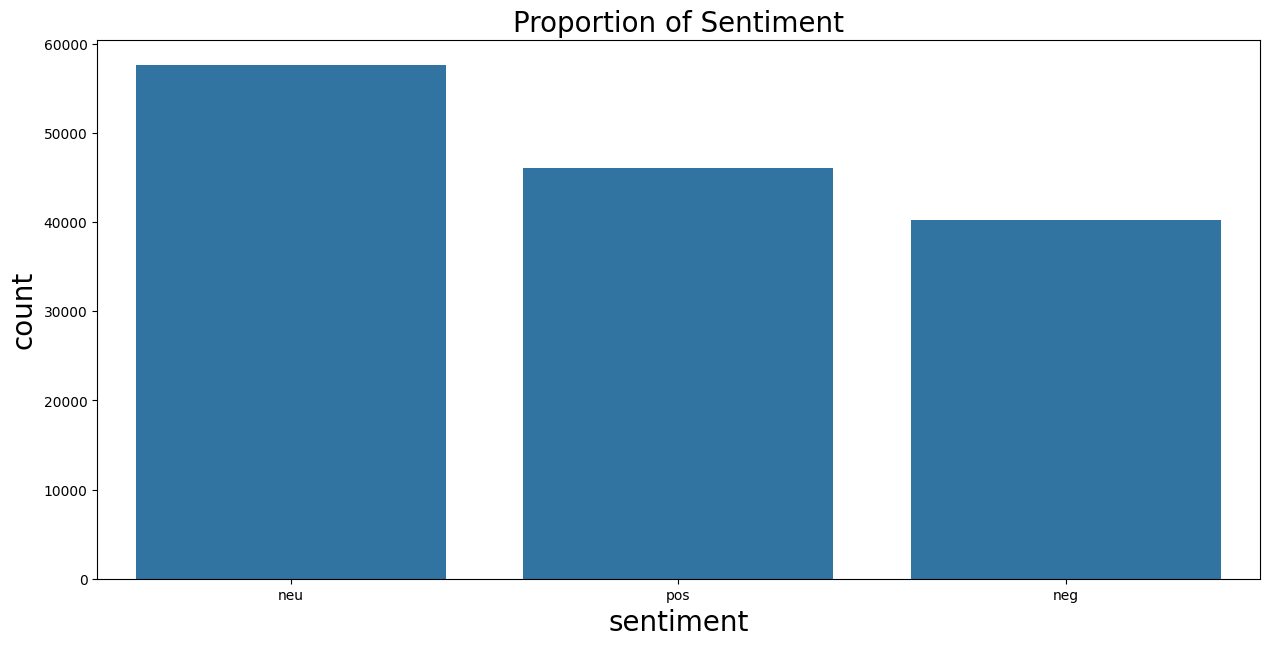

In [53]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

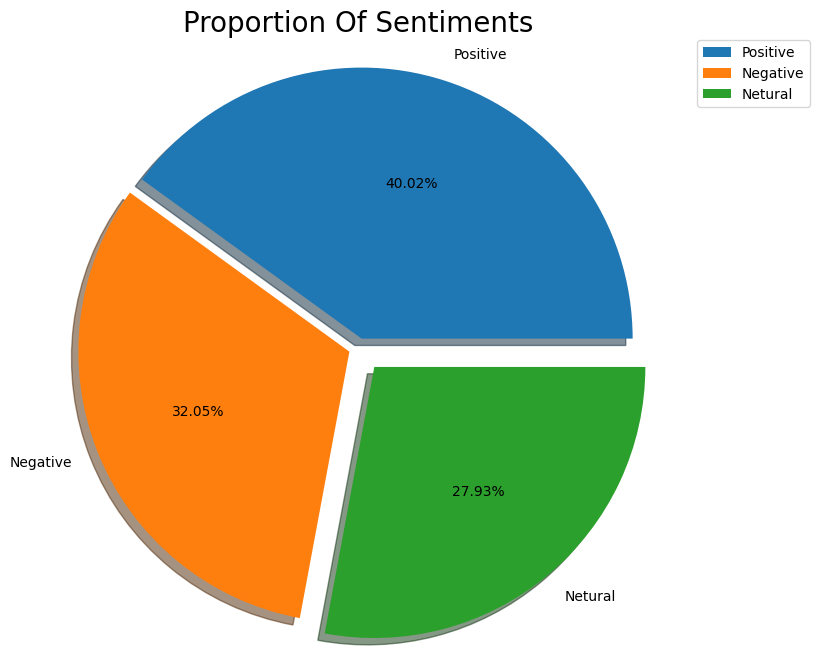

In [54]:
sentiment_count1 = df['sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [55]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [56]:
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

In [91]:
#Assigning dependent and independent features
X= df['lemmed']
y=df['sentiment']
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(100732,)


(43171,)

In [92]:
print(X_train.head())
y_train.head()

52483     rt thebeigesirkeir must congratulate governmen...
23258     rt rarohde map showing relative reduction huma...
19004     rt nrpanews walk nature countless health benef...
42213     know might feeling like isnâ€™t much around ho...
125959    rt news24 dog waited owner lobby wuhan hospita...
Name: lemmed, dtype: object


52483     neg
23258     neu
19004     pos
42213     pos
125959    neg
Name: sentiment, dtype: object

In [122]:
# Print a sample of the DataFrame to check the values in the 'sentiment' and 'clean_tweets' columns
print(df[['sentiment', 'clean_tweets']].head(10))

# Check unique values in the 'sentiment' column to ensure they match expected values
print(df['sentiment'].unique())


  sentiment                                       clean_tweets
0       pos  rt glblctzn priyankachopra calling leaders hel...
1       pos  rt ogsgofficial ogun state support cbnnirsal c...
2       pos  rt advobarryroux 5 police officials based nama...
3       neu  rt mobilepunch covid19 oyo discharges two pati...
4       neu                 condolences family survive covid19
5       neu  rt drjmzimmerman received text 19 year old son...
6       neg  taiwans vicepresident chen chienjen countrys f...
7       neg  rt morethanmysle breaking new york woman coron...
8       neu  horrible tragedy nova scotia today families ge...
9       neu  tahirsyeedk sagarikaghose covid19 cured sooner...
['pos' 'neu' 'neg']


Positive Text Length: 4841011
Positive Text Sample: rt glblctzn priyankachopra calling leaders help protect refugees covid19 providing quality health ca
Negative Text Length: 4153791
Negative Text Sample: taiwans vicepresident chen chienjen countrys fight covid19â httpstcosmdtnfafzf rt morethanmysle brea
Neutral Text Length: 5828722
Neutral Text Sample: rt mobilepunch covid19 oyo discharges two patients httpstcoeqre00zijo condolences family survive cov


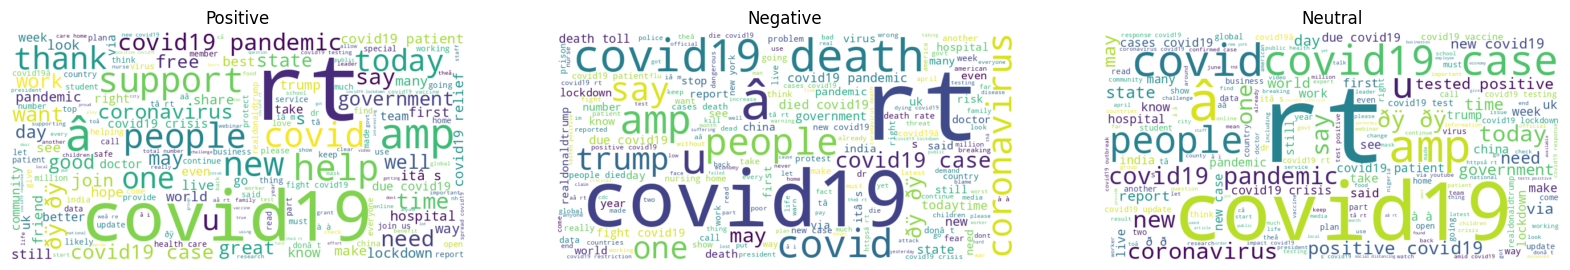

In [123]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data based on sentiment
positive_text = ' '.join(df[df['sentiment'] == 'pos']['clean_tweets'].astype(str))
negative_text = ' '.join(df[df['sentiment'] == 'neg']['clean_tweets'].astype(str))
neutral_text = ' '.join(df[df['sentiment'] == 'neu']['clean_tweets'].astype(str))

# Debug: Print the length and a sample of the texts
print("Positive Text Length:", len(positive_text))
print("Positive Text Sample:", positive_text[:100])

print("Negative Text Length:", len(negative_text))
print("Negative Text Sample:", negative_text[:100])

print("Neutral Text Length:", len(neutral_text))
print("Neutral Text Sample:", neutral_text[:100])

# Create a figure for the word clouds
plt.figure(figsize=(20, 10))

# Check for empty text and generate word clouds accordingly
if positive_text:
    wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.subplot(1, 3, 1)
    plt.title('Positive')
    plt.imshow(wc_positive, interpolation='bilinear')
    plt.axis('off')
else:
    print("No positive text data available.")

if negative_text:
    wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.subplot(1, 3, 2)
    plt.title('Negative')
    plt.imshow(wc_negative, interpolation='bilinear')
    plt.axis('off')
else:
    print("No negative text data available.")

if neutral_text:
    wc_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
    plt.subplot(1, 3, 3)
    plt.title('Neutral')
    plt.imshow(wc_neutral, interpolation='bilinear')
    plt.axis('off')
else:
    print("No neutral text data available.")

# Show the plot
plt.show()


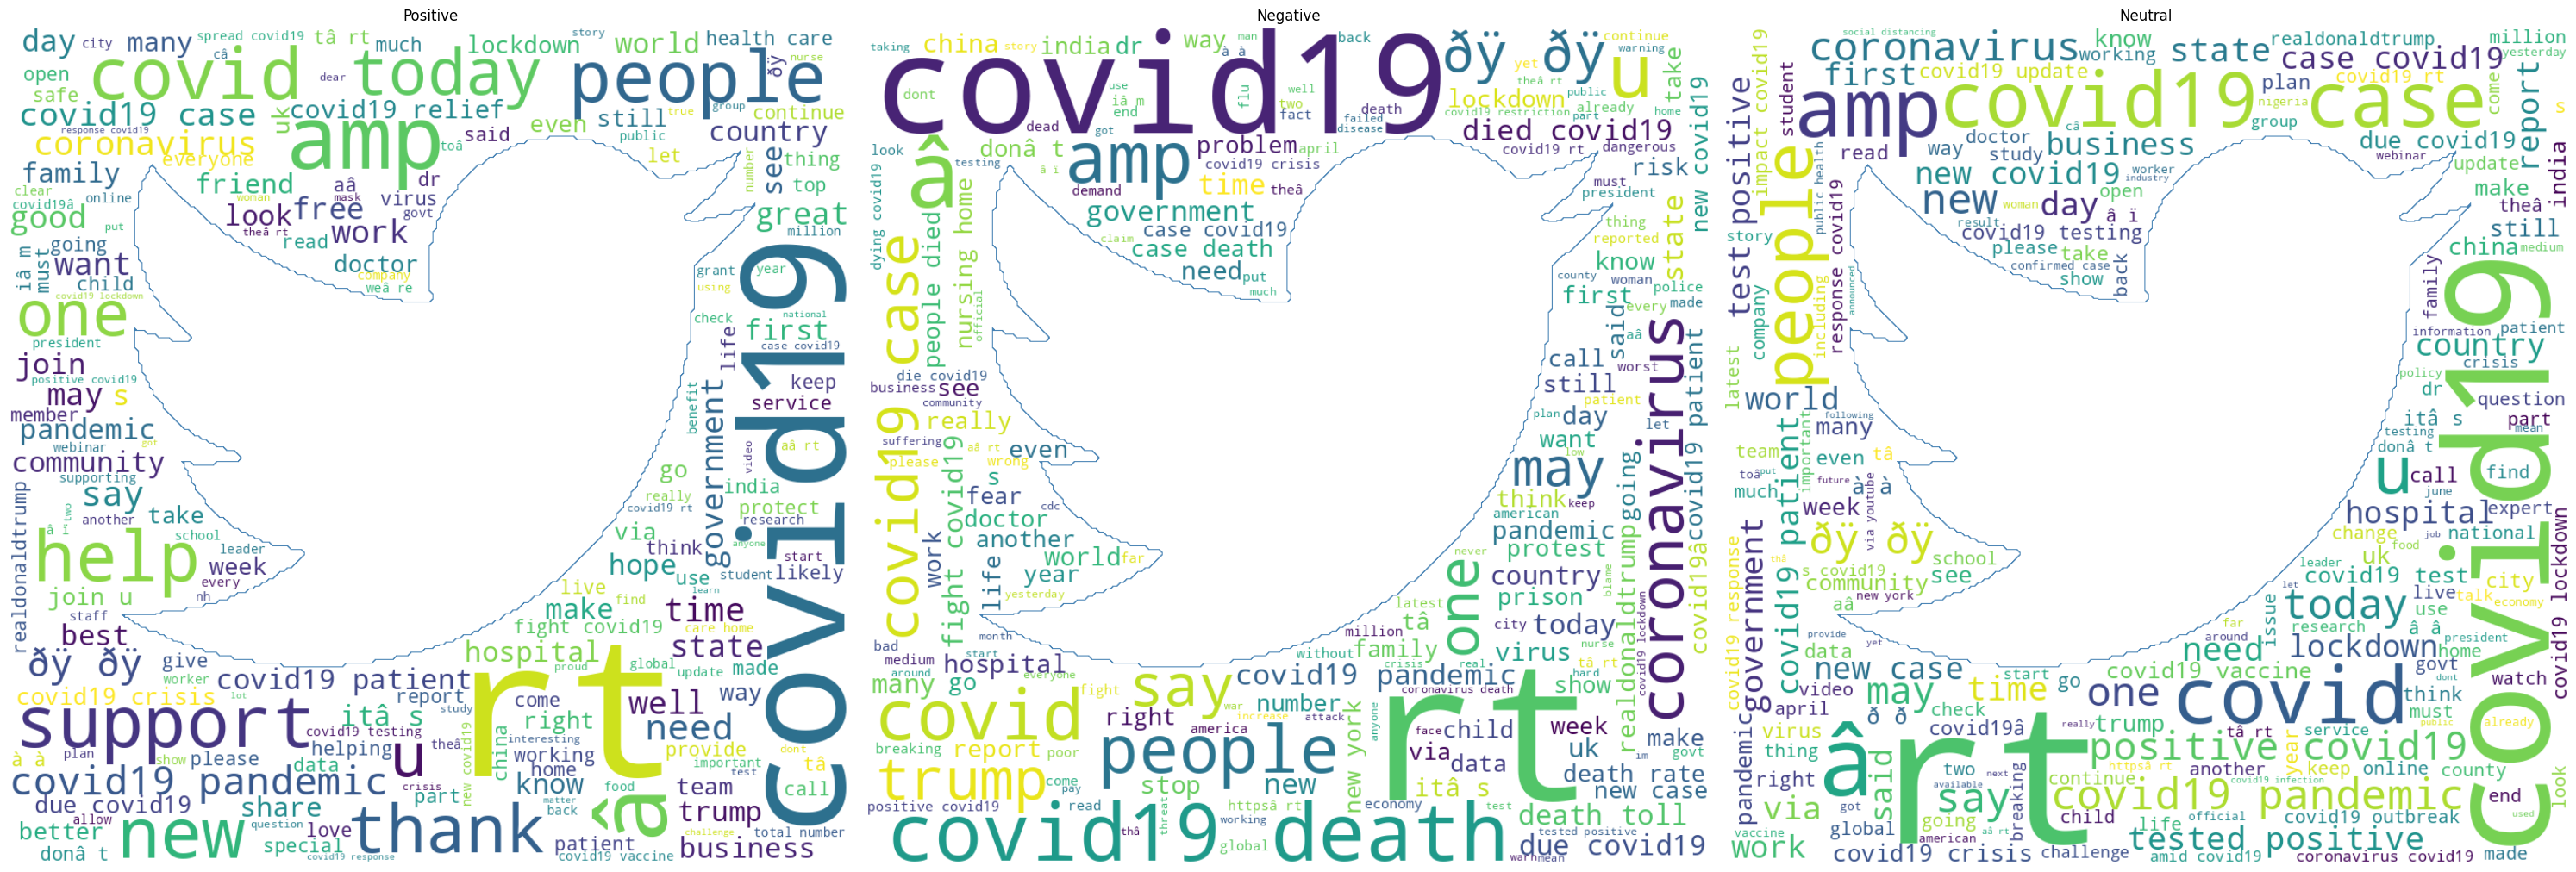

In [126]:
mask_path = "/content/white-twitter-logo-icon-8.png"

# Read the mask image
mask = np.array(Image.open(mask_path))

# Create a word cloud object with the mask
wc = WordCloud(background_color='white', mask=mask, contour_width=1, contour_color='steelblue')

# Filter data based on sentiment
positive_text = ' '.join(df[df['sentiment'] == 'pos']['lemmed'].astype(str))
negative_text = ' '.join(df[df['sentiment'] == 'neg']['lemmed'].astype(str))
neutral_text = ' '.join(df[df['sentiment'] == 'neu']['lemmed'].astype(str))

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    if text:
        wc.generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"No {title} text data available.")

# Create a figure for the word clouds
plt.figure(figsize=(30, 10))

# Plot word clouds
plt.subplot(1, 3, 1)
generate_wordcloud(positive_text, 'Positive')

plt.subplot(1, 3, 2)
generate_wordcloud(negative_text, 'Negative')

plt.subplot(1, 3, 3)
generate_wordcloud(neutral_text, 'Neutral')

# Show the plot
plt.tight_layout()
plt.show()

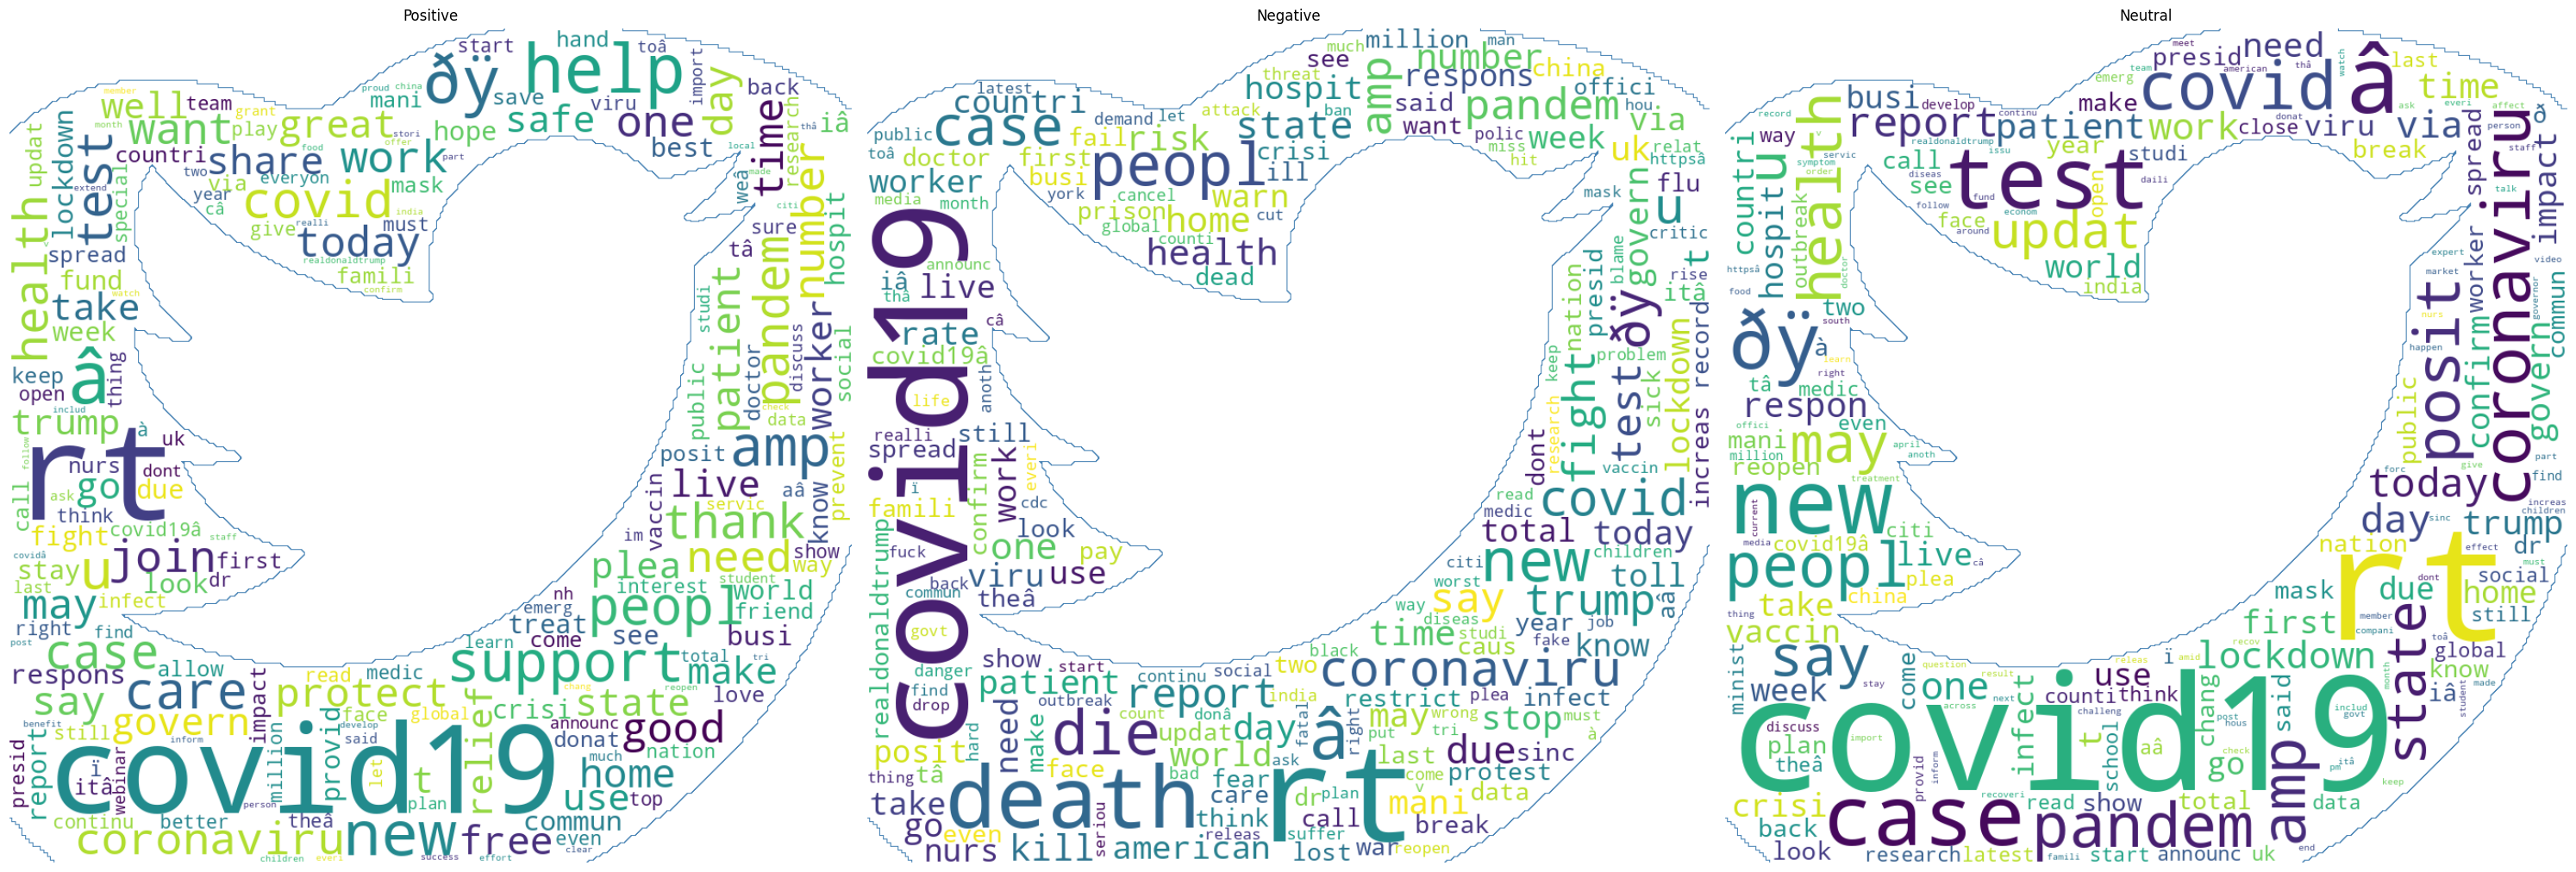

In [128]:
mask_path = "/content/white-twitter-logo-icon-8.png"

# Read the mask image
mask = np.array(Image.open(mask_path))

# Ensure the mask is correctly processed
mask[mask == 0] = 255  # Ensure the background is white

# Create a word cloud object with the mask
wc = WordCloud(background_color='white', mask=mask, contour_width=1, contour_color='steelblue', collocations=False)

# Filter data based on sentiment
positive_text = ' '.join(df[df['sentiment'] == 'pos']['stemmed'].astype(str))
negative_text = ' '.join(df[df['sentiment'] == 'neg']['stemmed'].astype(str))
neutral_text = ' '.join(df[df['sentiment'] == 'neu']['stemmed'].astype(str))

# Function to generate and display word cloud
def generate_wordcloud(text, title):
    if text:
        wc.generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"No {title} text data available.")

# Create a figure for the word clouds
plt.figure(figsize=(30, 10))

# Plot word clouds
plt.subplot(1, 3, 1)
generate_wordcloud(positive_text, 'Positive')

plt.subplot(1, 3, 2)
generate_wordcloud(negative_text, 'Negative')

plt.subplot(1, 3, 3)
generate_wordcloud(neutral_text, 'Neutral')

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())
tv_X_train.shape

(100732, 38228)

In [94]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

In [96]:
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [97]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)
pred_lr_cv

array(['pos', 'neg', 'pos', ..., 'neg', 'pos', 'neg'], dtype=object)

In [98]:
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.9345393898681985


In [99]:
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

         neg       0.95      0.88      0.92     12058
         neu       0.91      0.99      0.95     17276
         pos       0.95      0.92      0.93     13837

    accuracy                           0.93     43171
   macro avg       0.94      0.93      0.93     43171
weighted avg       0.94      0.93      0.93     43171



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

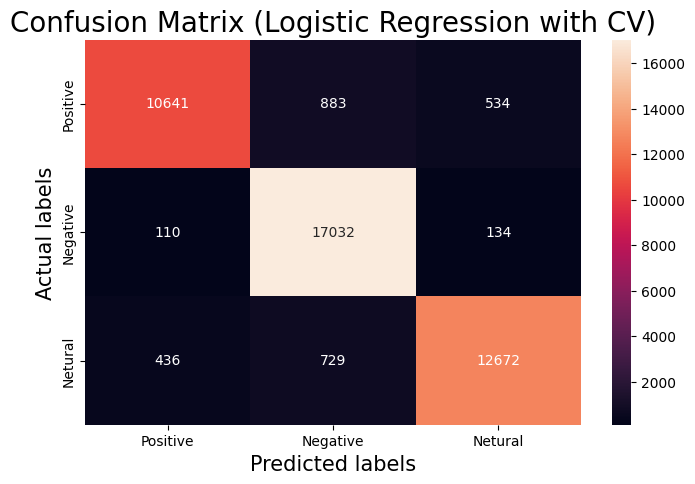

In [100]:
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [101]:
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)
pred_dt_cv

array(['pos', 'neg', 'pos', ..., 'neg', 'pos', 'neg'], dtype=object)

In [103]:
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.9123714406054839


In [104]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

         neg       0.90      0.87      0.88     12058
         neu       0.94      0.96      0.95     17276
         pos       0.90      0.91      0.90     13837

    accuracy                           0.92     43171
   macro avg       0.91      0.91      0.91     43171
weighted avg       0.92      0.92      0.92     43171



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

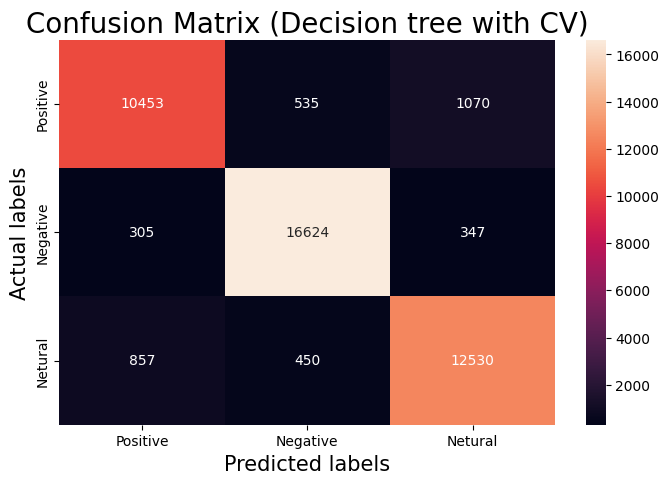

In [105]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [111]:
print(df.columns)

Index(['original_text', 'sentiment', 'clean_tweets', 'stemmed', 'lemmed',
       'temp_list'],
      dtype='object')
